In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from DTHelper import experiment, NUM_TRIALS

# Importing and Preparing Dataset

In [2]:
# Import student performances dataset
student_performance = pd.read_csv('./StudentPerformance/student-mat.csv', sep=';')

# Change all Final Grade accordingly:
# +1 if Final Grade >= 12
# -1 if Final Grade < 12
student_performance['G3'] = student_performance['G3'].apply(lambda x: 1 if x >= 12 else -1)

student_performance.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,-1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,-1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,-1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,-1


In [3]:
# Remove columns we are not using, keeping only G3, Absences, and G1
student_performance = student_performance[['G3', 'absences', 'G1']]
student_performance.columns = ['Final Grade', 'Absences', 'First Period Grade']

# Drop all rows with NaN values
student_performance = student_performance.dropna()

student_performance.head()

,Final Grade,Absences,First Period Grade
0,-1,6,5
1,-1,4,5
2,-1,10,7
3,1,2,15
4,-1,4,6


In [4]:
# Prepare data for training
X = student_performance[['Absences', 'First Period Grade']].to_numpy()
Y = student_performance['Final Grade'].to_numpy()

x_label = 'Absences'
y_label = 'First Period Grade'
pos_label = 'Pass'
neg_label = 'Fail'

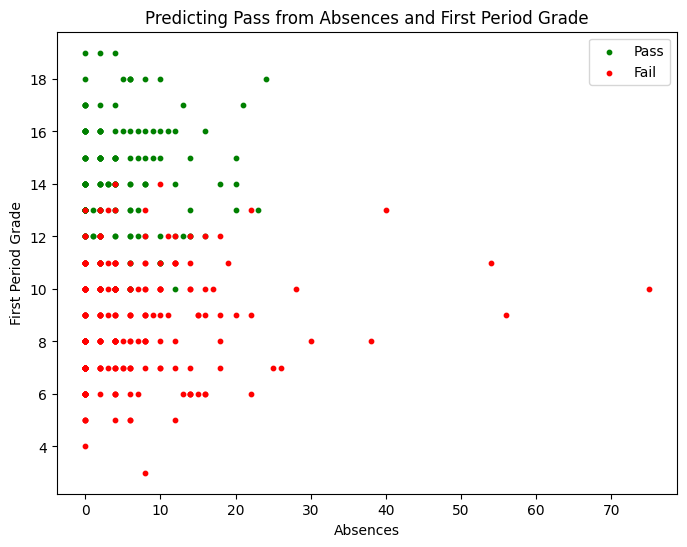

In [5]:
# Visualize the data
indices_pos1 = (Y == 1).nonzero()[0]
indices_neg1 = (Y == -1).nonzero()[0]
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1],
            c='green', label=pos_label, s=10)
plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1],
            c='red', label=neg_label, s=10)
plt.legend()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'Predicting {pos_label} from {x_label} and {y_label}')
plt.show()

# 80% Training / 20% Testing

Trial 1


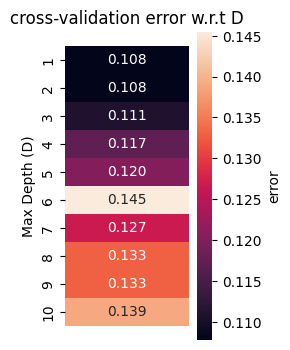

Optimal depth: 1
Optimal training error: 0.10759493670886078
Trial 2


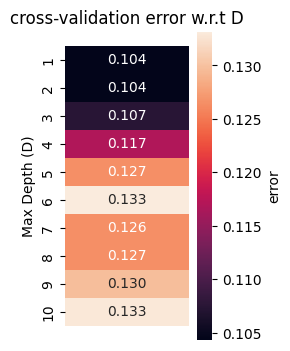

Optimal depth: 1
Optimal training error: 0.10443037974683544
Trial 3


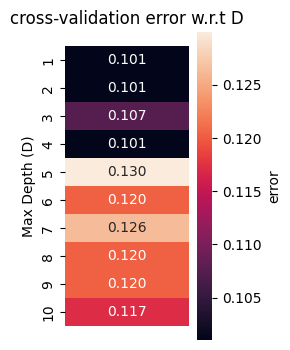

Optimal depth: 1
Optimal training error: 0.10126582278481011
Trial 4


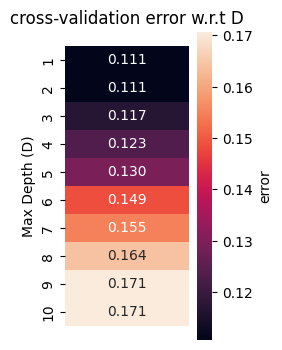

Optimal depth: 1
Optimal training error: 0.11075949367088611
Trial 5


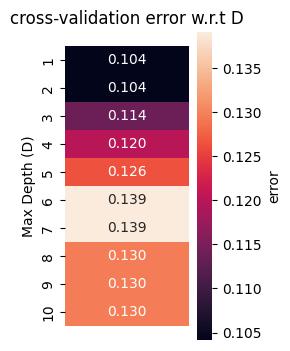

Optimal depth: 1
Optimal training error: 0.10443037974683544


In [6]:
# Run experiment with 20% test size
best_classifiers_82 = experiment(X, Y, test_size=0.2)

In [7]:
avg_test_error_82 = 0
for (key, value) in best_classifiers_82.items():
    print(f'D: {value['opt_D']}')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_82 += value['opt_e_testing']

avg_test_error_82 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_82}')

D: 1
Training Error: 0.10759493670886078
Test Error: 0.11392405063291144
D: 1
Training Error: 0.10443037974683544
Test Error: 0.12658227848101267
D: 1
Training Error: 0.10126582278481011
Test Error: 0.1392405063291139
D: 1
Training Error: 0.11075949367088611
Test Error: 0.10126582278481011
D: 1
Training Error: 0.10443037974683544
Test Error: 0.12658227848101267
Average Test Error: 0.12151898734177216


# 50% Training / 50% Testing

Trial 1


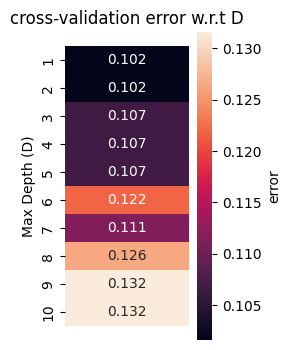

Optimal depth: 1
Optimal training error: 0.10152284263959388
Trial 2


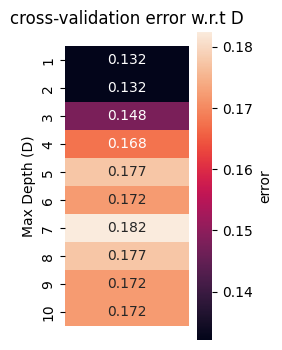

Optimal depth: 1
Optimal training error: 0.13197969543147203
Trial 3


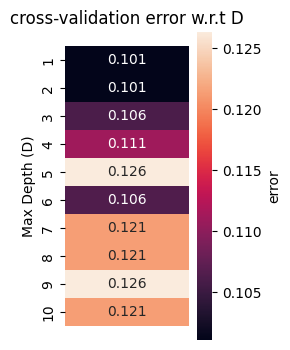

Optimal depth: 1
Optimal training error: 0.10152284263959388
Trial 4


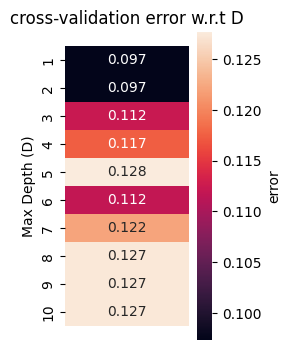

Optimal depth: 1
Optimal training error: 0.09644670050761417
Trial 5


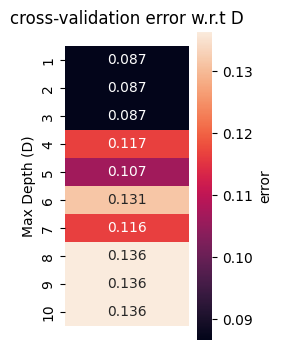

Optimal depth: 1
Optimal training error: 0.08629441624365486


In [8]:
# Run experiment with 50% test size
best_classifiers_55 = experiment(X, Y, test_size=0.5)

In [9]:
avg_test_error_55 = 0
for (key, value) in best_classifiers_55.items():
    print(f'D: {value['opt_D']}')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_55 += value['opt_e_testing']

avg_test_error_55 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_55}')

D: 1
Training Error: 0.10152284263959388
Test Error: 0.11616161616161613
D: 1
Training Error: 0.13197969543147203
Test Error: 0.08585858585858586
D: 1
Training Error: 0.10152284263959388
Test Error: 0.11616161616161613
D: 1
Training Error: 0.09644670050761417
Test Error: 0.12121212121212122
D: 1
Training Error: 0.08629441624365486
Test Error: 0.13131313131313127
Average Test Error: 0.11414141414141413


# 20% Training / 80% Testing

Trial 1


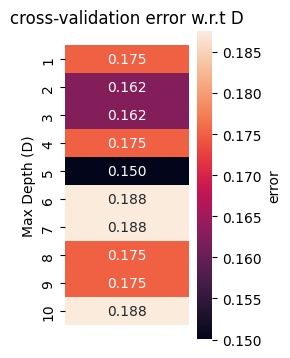

Optimal depth: 5
Optimal training error: 0.05063291139240511
Trial 2


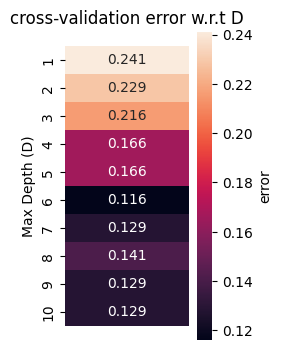

Optimal depth: 6
Optimal training error: 0.03797468354430378
Trial 3


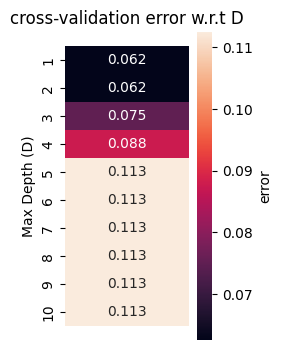

Optimal depth: 1
Optimal training error: 0.06329113924050633
Trial 4


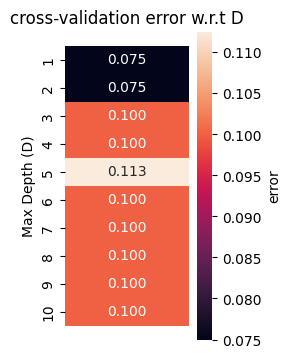

Optimal depth: 1
Optimal training error: 0.06329113924050633
Trial 5


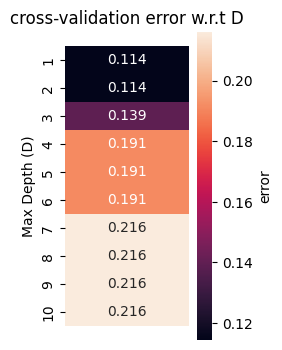

Optimal depth: 1
Optimal training error: 0.10126582278481011


In [10]:
# Run experiment with 80% test size
best_classifiers_28 = experiment(X, Y, 0.8)

In [11]:
avg_test_error_28 = 0
for (key, value) in best_classifiers_28.items():
    print(f'D: {value['opt_D']}')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_28 += value['opt_e_testing']

avg_test_error_28 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_28}')

D: 5
Training Error: 0.05063291139240511
Test Error: 0.16455696202531644
D: 6
Training Error: 0.03797468354430378
Test Error: 0.18670886075949367
D: 1
Training Error: 0.06329113924050633
Test Error: 0.120253164556962
D: 1
Training Error: 0.06329113924050633
Test Error: 0.120253164556962
D: 1
Training Error: 0.10126582278481011
Test Error: 0.11075949367088611
Average Test Error: 0.14050632911392405


# All Available Variables
- best_classifiers_82
- avg_test_error_82
- best_classifiers_55
- avg_test_error_55
- best_classifiers_28
- avg_test_error_28

Best Classifiers: Contains lowest training error (best-in-fold) classifiers from all trials

Average Test Error: Average test error of the best classifiers (lowest validation error) from each trial

In [12]:
print('Average Test Error for 20% Test Size: ', avg_test_error_82)
print('Average Test Error for 50% Test Size: ', avg_test_error_55)
print('Average Test Error for 80% Test Size: ', avg_test_error_28)

Average Test Error for 20% Test Size:  0.12151898734177216
Average Test Error for 50% Test Size:  0.11414141414141413
Average Test Error for 80% Test Size:  0.14050632911392405
